<a href="https://colab.research.google.com/github/sdhar2020/Visualization-Exploratory-Analysis/blob/master/Researching_US_birth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction To The Dataset

In [8]:
dlink= 'https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_1994-2003_CDC_NCHS.csv'

In [17]:
import requests
f = requests.get(dlink)
csv_list=f.text.split('\r')

In [20]:
csv_list[1:10]

['1994,1,1,6,8096',
 '1994,1,2,7,7772',
 '1994,1,3,1,10142',
 '1994,1,4,2,11248',
 '1994,1,5,3,11053',
 '1994,1,6,4,11406',
 '1994,1,7,5,11251',
 '1994,1,8,6,8653',
 '1994,1,9,7,7910']

In [25]:
def read_list_raw(dlink):
  f = requests.get(dlink)
  csv_list=f.text.split('\r')
  return(csv_list)

# Converting Data Into A List Of Lists

In [26]:
def read_csv(filename):
    string_list=read_list_raw(filename)[1:]
    final_list = []
    
    for row in string_list:
        string_fields = row.split(",")
        int_fields = []
        for value in string_fields:
            int_fields.append(int(value))
        final_list.append(int_fields)
    return(final_list)
        
cdc_list = read_csv(dlink)

In [27]:
cdc_list[0:10]

[[1994, 1, 1, 6, 8096],
 [1994, 1, 2, 7, 7772],
 [1994, 1, 3, 1, 10142],
 [1994, 1, 4, 2, 11248],
 [1994, 1, 5, 3, 11053],
 [1994, 1, 6, 4, 11406],
 [1994, 1, 7, 5, 11251],
 [1994, 1, 8, 6, 8653],
 [1994, 1, 9, 7, 7910],
 [1994, 1, 10, 1, 10498]]

# Calculating Number Of Births Each Month

In [29]:
def read_csv(filename):
    string_list= read_list_raw(filename)[1:]
    final_list = []
    
    for row in string_list:
        string_fields = row.split(",")
        int_fields = []
        for value in string_fields:
            int_fields.append(int(value))
        final_list.append(int_fields)
    return final_list
        
cdc_list = read_csv(dlink)


def month_births(data):
    births_per_month = {}
    
    for row in data:
        month = row[1]
        births = row[4]
        if month in births_per_month:
            births_per_month[month] = births_per_month[month] + births
        else:
            births_per_month[month] = births
    return births_per_month
    
cdc_month_births = month_births(cdc_list)

In [30]:
cdc_month_births

{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

# Calculating Number Of Births Each Day Of Week

In [31]:
def dow_births(data):
    births_per_dow = {}
    
    for row in data:
        dow = row[3]
        births = row[4]
        if dow in births_per_dow:
            births_per_dow[dow] = births_per_dow[dow] + births
        else:
            births_per_dow[dow] = births
    return births_per_dow
    
cdc_dow_births = dow_births(cdc_list)

In [32]:
cdc_dow_births

{1: 5789166,
 2: 6446196,
 3: 6322855,
 4: 6288429,
 5: 6233657,
 6: 4562111,
 7: 4079723}

# Creating A More General Function

In [33]:
def calc_counts(data, column):
    sums_dict = {}
    
    for row in data:
        col_value = row[column]
        births = row[4]
        if col_value in sums_dict:
            sums_dict[col_value] = sums_dict[col_value] + births
        else:
            sums_dict[col_value] = births
    return sums_dict

cdc_year_births = calc_counts(cdc_list, 0)
cdc_month_births = calc_counts(cdc_list, 1)
cdc_dom_births = calc_counts(cdc_list, 2)
cdc_dow_births = calc_counts(cdc_list, 3)

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def plot_barh_dict(d):
  plt.figure(figsize=(12,8))
  plt.yticks(np.arange(len(d)),list(d.keys()))
  plt.barh(range(len(d)), d.values(), align='center')

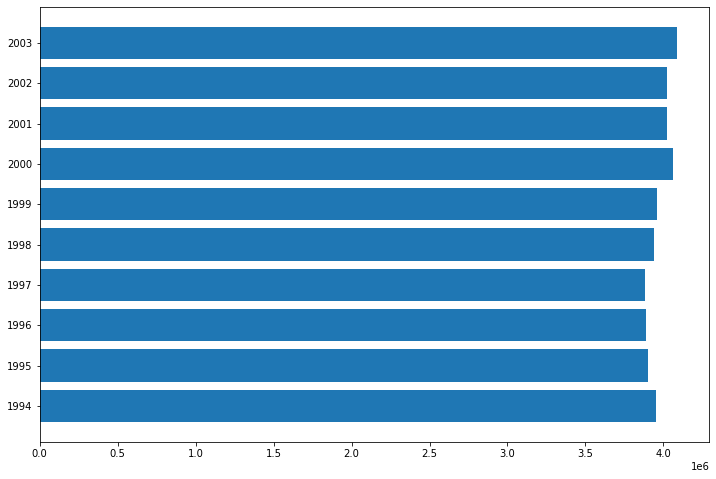

In [90]:
plot_barh_dict(cdc_year_births)

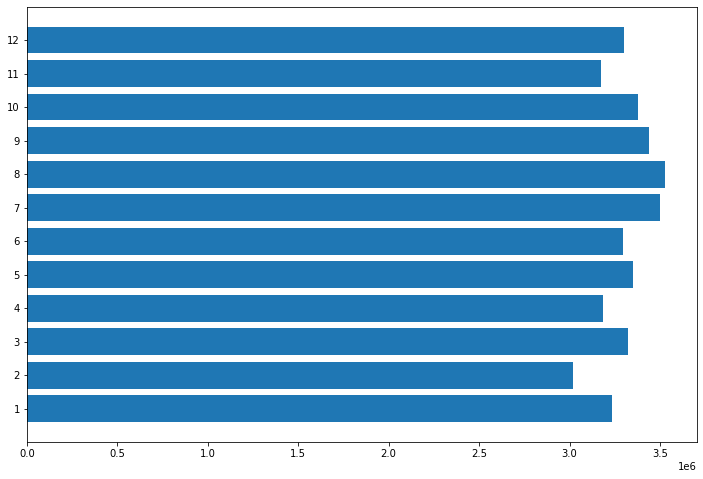

In [91]:
plot_barh_dict(cdc_month_births)

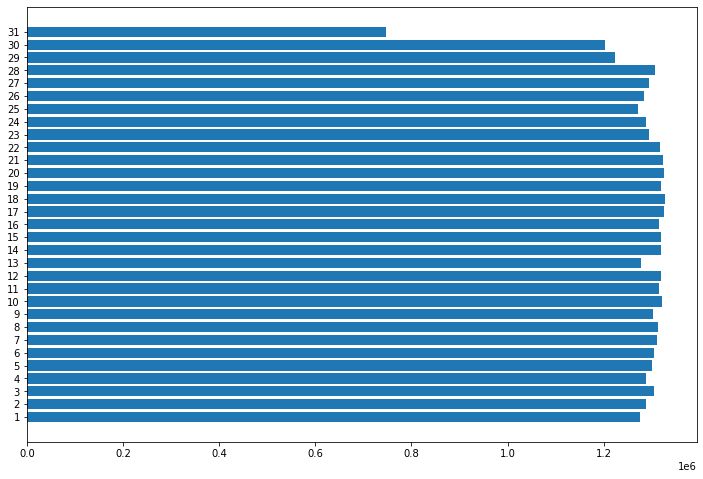

In [92]:
plot_barh_dict(cdc_dom_births)

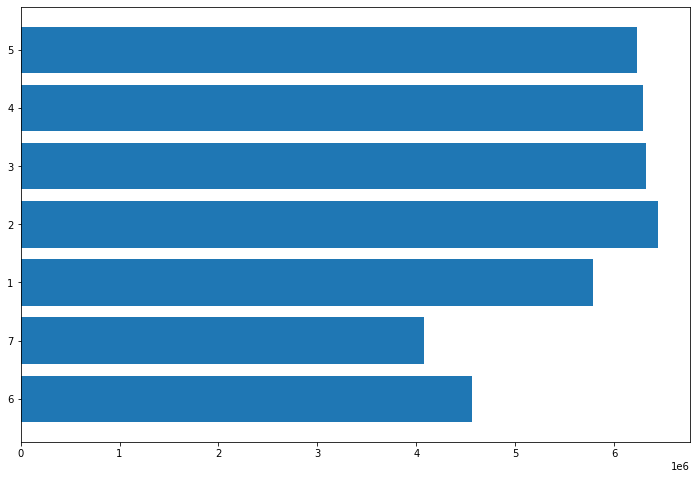

In [93]:
plot_barh_dict(cdc_dow_births)